In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv


- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town

- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT - \% lower status of the population

- MEDV - Median value of owner-occupied homes in $1000's

In [2]:
X_full = pd.read_csv("../input/the-boston-houseprice-data/boston.csv")

In [3]:
X_full.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
X_full.shape

(506, 14)

In [5]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
X_full.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Searching for outliers 

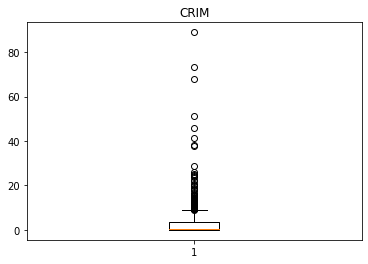

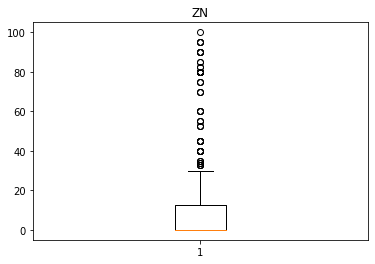

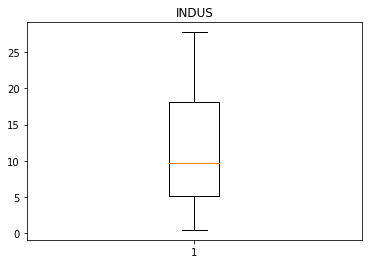

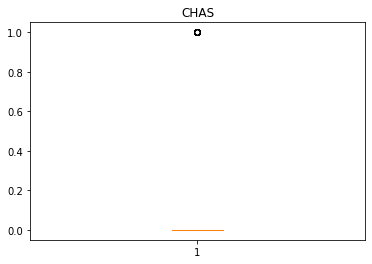

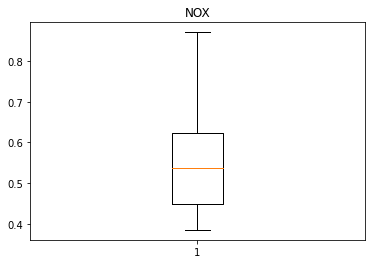

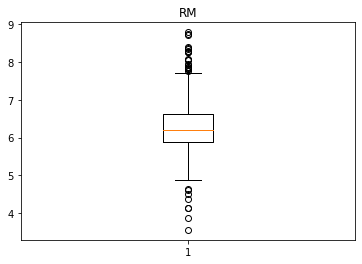

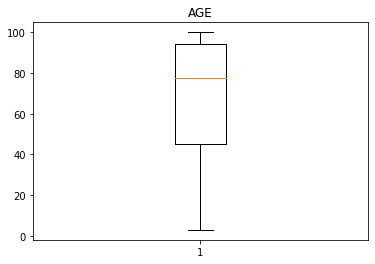

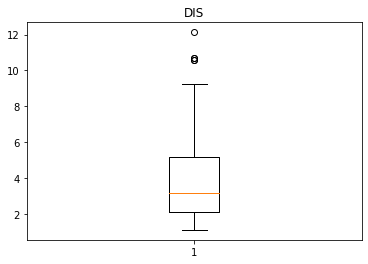

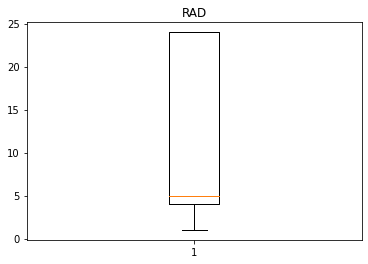

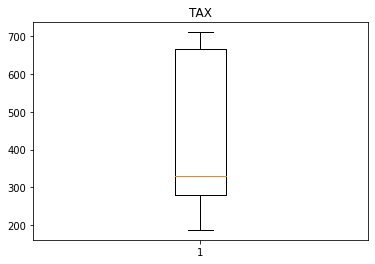

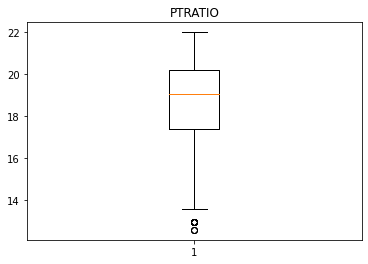

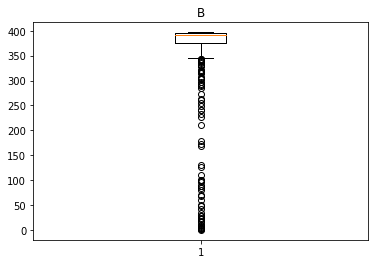

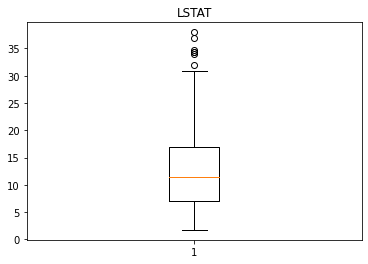

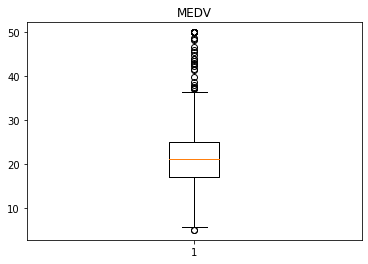

In [7]:
import matplotlib.pyplot as plt

for feature in X_full:
    plt.figure()
    plt.title(feature)
    plt.boxplot(X_full[feature])

In [8]:
# Function that removes the outliers
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [9]:
cols_with_outliers = ['MEDV','LSTAT','B','DIS','RM','CHAS','ZN','CRIM']
X_full_with_out = X_full.shape[0]
X_full = remove_outliers(X_full,cols_with_outliers,3)

Working on column: MEDV
Working on column: LSTAT
Working on column: B
Working on column: DIS
Working on column: RM
Working on column: CHAS
Working on column: ZN
Working on column: CRIM


In [10]:
print(X_full_with_out - X_full.shape[0], 'outliers were removed of the dataset')

80 outliers were removed of the dataset


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff7a85428d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff7a8542e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff7a85425d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff7a854c550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff7a854c890>],
 'means': []}

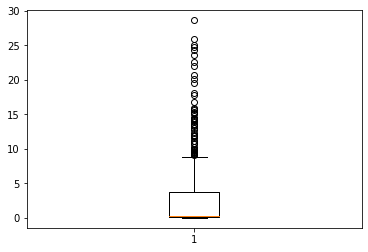

In [11]:
 plt.boxplot(X_full['CRIM'])


# Normalizing Data and Using SimpleImputer

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
cols = X_full.columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_transformer = SimpleImputer()

X_full = pd.DataFrame(numerical_transformer.fit_transform(X_full),columns = cols)
X_full = pd.DataFrame(scaler.fit_transform(X_full),columns = cols)


In [13]:
# Normalized and without NAN values DataFrame

X_full.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.24,0.040015,0.0,0.309129,0.631072,0.641607,0.362674,0.000000,0.206501,0.280488,1.000000,0.100650,0.414414
1,0.000733,0.00,0.219706,0.0,0.165975,0.598827,0.782698,0.471579,0.043478,0.103250,0.585366,1.000000,0.229483,0.360360
2,0.000732,0.00,0.219706,0.0,0.165975,0.758794,0.599382,0.471579,0.043478,0.103250,0.585366,0.989737,0.071229,0.655405
3,0.000909,0.00,0.035108,0.0,0.143154,0.719640,0.441813,0.607552,0.086957,0.065010,0.695122,0.994276,0.037473,0.626126
4,0.002190,0.00,0.035108,0.0,0.143154,0.750838,0.528321,0.607552,0.086957,0.065010,0.695122,1.000000,0.111490,0.689189


In [14]:
X_full.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [15]:
X = X_full.drop(['MEDV'],axis=1)
y = X_full['MEDV']

In [16]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


SEED=42

X_train,X_val,y_train,y_val = train_test_split(X,y,random_state = SEED,test_size = 0.2)

# GridSearchCV to found HyperParameters

In [17]:
from sklearn.model_selection import GridSearchCV

model_xgbr = XGBRegressor(seed=SEED)

parameter_trials={'n_estimators':[i for i in range(200,0,-5)],
                  'learning_rate':[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],          
                  'n_jobs': [-1],
                 }

In [18]:
grid_search = GridSearchCV(model_xgbr,
                           parameter_trials,
                           cv=5,
                           n_jobs=-1,
                           verbose=0)

grid_search_results = grid_search.fit(X_train,y_train)

In [19]:
print(grid_search_results.best_params_)

{'learning_rate': 0.8, 'n_estimators': 200, 'n_jobs': -1}


In [20]:
model_xgbr = XGBRegressor(learning_rate=0.8,n_estimators=200,n_jobs=-1,seed=SEED)

In [21]:
model_xgbr.fit(X_train,y_train)
xgbr_preds = model_xgbr.predict(X_val)

xgbr_mae = mean_absolute_error(y_val,xgbr_preds)
xgbr_r2 = r2_score(y_val,xgbr_preds)

In [22]:
print(f"XGBR MAE: {xgbr_mae}\nXGBR R²: {xgbr_r2}")

pd.DataFrame({
    'actual':y_val,
    'predicted':xgbr_preds
})

XGBR MAE: 0.054162875160484375
XGBR R²: 0.8454130998727564


,actual,predicted
418,0.351351,0.319722
75,0.504505,0.553092
176,0.659910,0.696944
30,0.159910,0.218777
357,0.069820,0.090016
...,...,...
375,0.191441,0.215471
57,0.295045,0.321939
124,0.195946,0.278039
24,0.225225,0.204093


In [23]:
model_rfr = RandomForestRegressor()

parameter_rfr = {
    'n_estimators':[i for i in range(100,0,-5)],
    'criterion':['squared_error','absolute_error','poisson'],
    'n_jobs':[-1],
    'random_state':[42]
}

In [24]:
rfr_grid_search = GridSearchCV(model_rfr,
                              parameter_rfr,
                              verbose=0,
                              cv=5,
                              n_jobs=-1)

rfr_grid_results = rfr_grid_search.fit(X_train,y_train)

In [25]:
print(rfr_grid_results.best_params_)

{'criterion': 'squared_error', 'n_estimators': 85, 'n_jobs': -1, 'random_state': 42}


In [26]:
model_rfr_best = RandomForestRegressor(criterion='squared_error',
                                      n_estimators=85,
                                      n_jobs=-1,
                                      random_state=42)

model_rfr_best.fit(X_train,y_train)
rfr_preds = model_rfr_best.predict(X_val)

rfr_mae = mean_absolute_error(y_val,rfr_preds)
r2_rfr = r2_score(y_val,rfr_preds)

In [27]:
print(f'RFR MAE: {rfr_mae}\nRFR R²: {r2_rfr}')
pd.DataFrame({
    'Actual':y_val,
    'Predicted':rfr_preds
})

RFR MAE: 0.040905645727807104
RFR R²: 0.9100655736489764


,Actual,Predicted
418,0.351351,0.324510
75,0.504505,0.469820
176,0.659910,0.651537
30,0.159910,0.213540
357,0.069820,0.080949
...,...,...
375,0.191441,0.228670
57,0.295045,0.292422
124,0.195946,0.254346
24,0.225225,0.271277
